In [1]:
# Run this first so it's ready by the time you need it
install.packages("readr")
install.packages("supernova")
install.packages("ggformula")
library(readr)
library(supernova)
library(ggformula)
GSS <- read_csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/GSS.csv")

#smaller dataset, more similar in size to most psychology studies
set.seed(10)
GSS_subset <- GSS_subset <- sample_n(GSS, 100)


The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpBhZztb/downloaded_packages

The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpBhZztb/downloaded_packages

The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpBhZztb/downloaded_packages

The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpBhZztb/downloaded_packages



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: ggstance


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:supernova’:

    number


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: ggridges


New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")

Rows: 2348 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (34): number_of_children, age_of_respondent, college_major_1, college_ma...


# Chapter 18 - Significance Testing with Models

## 18.1 Significant models

In the previous chapter we learned how to use the sampling distribution of &beta; to test the null hypothesis. Using permutation testing, we generated a sampling distribution for a world in which &beta; = 0 is true in the data generation process. We used the sampling distribution to calculate the p-value, the probability that the sample b, or a b more extreme than the sample, would have occurred just by chance if the null hypothesis were true. Based on the p-value, and the decision criterion we had set (i.e., &alpha; of .05), we decided whether to reject the null hypothesis or not.

Decisions of statistical significance are made about one statistical estimate at a time. Thus, it is a common tool for psychologists who are interested in questions such as "is *this* effect a real part of the data generation process?" To answer that question they will build a statistical model with that effect included, calculate a p-value, and then interpret the p-value of that effect in particular. 

But that's not the only type of research question you might have. Perhaps instead of one particular variable, you're interested in whether a set of multiple variables together are helpful for making predictions about an outcome. In other words, you want to know if your entire *model* is significant, not just any one predictor. 

As it turns out, the sampling distribution of &beta; is just one of many sampling distributions we could construct. Using the same approach we developed for one model coefficient, we could make a sampling distribution of any statistic that we can calculate. That includes estimates of whole model error such as PRE.

At this point, we're going to switch over to using a different name for PRE that is used more commonly - R<sup>2</sup>. "PRE" is the name used in the ```supernova()``` package we relied on for learning about error in models, but the concept of what proportion of error a model explains is more commonly discussed and written about as R<sup>2</sup>.

Using ```summary()``` on a model object, we can skip the ANOVA table entirely and find this value:

In [22]:
model_obj <- lm(highest_year_of_school_completed ~ highest_year_school_completed_mother +
                highest_year_school_completed_father, data = GSS_subset)
summary(model_obj)


Call:
lm(formula = highest_year_of_school_completed ~ highest_year_school_completed_mother + 
    highest_year_school_completed_father, data = GSS_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6085 -1.5057 -0.3986  1.6772  5.1415 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           9.60849    0.99629   9.644 5.05e-14 ***
highest_year_school_completed_mother  0.08480    0.10156   0.835  0.40693    
highest_year_school_completed_father  0.29020    0.09913   2.928  0.00475 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.249 on 63 degrees of freedom
  (34 observations deleted due to missingness)
Multiple R-squared:  0.2857,	Adjusted R-squared:  0.263 
F-statistic:  12.6 on 2 and 63 DF,  p-value: 2.494e-05


On the second to the last line of this output is an entry called "Multiple R-squared: 0.2857". This stands for the R<sup>2</sup> value in a regression model. It is also possible to get this value directly by saving the ```summary()``` output to its own object, and then finding the ```$r.squared``` property of the summary object. 

In [24]:
model_summary <- summary(model_obj)
model_summary$r.squared

[1] 0.2857142

We can easily verify that this is the same value as PRE is in the ANOVA table for the full model:

In [23]:
supernova(model_obj)

Refitting to remove 34 cases with missing value(s)
ℹ lm(formula = highest_year_of_school_completed ~ highest_year_school_completed_mother + highest_year_school_completed_father, data = listwise_delete(GSS_subset, c("highest_year_of_school_completed", "highest_year_school_completed_mother", "highest_year_school_completed_father")))



 Analysis of Variance Table (Type III SS)
 Model: highest_year_of_school_completed ~ highest_year_school_completed_mother + highest_year_school_completed_father

                                                             SS df     MS
 ------------------------------------ --------------- | ------- -- ------
                                Model (error reduced) | 127.463  2 63.732
 highest_year_school_completed_mother                 |   3.526  1  3.526
 highest_year_school_completed_father                 |  43.351  1 43.351
                                Error (from model)    | 318.658 63  5.058
 ------------------------------------ --------------- | ------- -- ------
                                Total (empty model)   | 446.121 65  6.863
      F    PRE     p
 ------ ------ -----
 12.600 0.2857 .0000
  0.697 0.0109 .4069
  8.571 0.1198 .0047
                    
 ------ ------ -----
                    

When assessing statistical models as a whole, rather than individual predictors, the statistic we care about is PRE/R<sup>2</sup>. We don't care so much how strong any one effect is, but together we want a model that explains at least some proportion of the variation in an outcome variable. In a world where this model is not helpful, it wouldn't explain any variance - the population R<sup>2</sup> value would be 0. Thus, for significance testing entire models, we need to examine the null sampling distribution of R<sup>2</sup> = 0. 

## 18.2 Null sampling distribution of R<sup>2</sup>

In order to construct a null sampling distribution of R<sup>2</sup>, we first need to understand what would cause a model to have R<sup>2</sup> = 0. The R<sup>2</sup> model reflects the proportion of variation in an outcome variable that a full model explains, relative to the empty model. This score can range from 0 to 1. With R<sup>2</sup> = 1, there would be no error left in a model; the set of explanatory variables the model uses results in perfect predictions about the outcome values.

The opposite, then, is when R<sup>2</sup> = 0. This would mean the full model explains no additional variation relative to the empty model. It performs exactly how the empty model would for making predictions. What would turn a full model into an empty model?

Recall the equation for the empty model: 

$$ \hat{Y}_i = b_0 $$

The only parameter in the model is b<sub>0</sub>. For a full multivariable model with two predictors, the equation would look like so: 

$$ \hat{Y}_i = b_0 + b_1X_{1i} + b_2X_{2i} $$

In order to make this match the equation of the empty model, we need to cancel out the extra terms. The situation that would create this is if both b<sub>1</sub> and b<sub>2</sub> were 0. 

$$ \hat{Y}_i = b_0 + (0)X_{1i} + (0)X_{2i} =$$

$$ \hat{Y}_i = b_0 $$

The null hypothesis for a full model is thus larger than any one parameter. It is the hypothesis that *all* predictor coefficients are equal to 0. You could write this as: 

$$H_0: \beta_1 = \beta_2 = 0 $$

Or, since the consequence of all coefficients being 0 are that no additional variation is explained beyond the empty model, you can write the null hypothesis as: 

$$H_0: R^2 = 0 $$

To create the null sampling distribution of one coefficient, last chapter we used permutation testing to shuffle the order of one predictor variable. That broke the relationship between the predictor and the outcome, making the true value of that predictor's coefficient equal to 0. We can use permutation testing for our full model situation as well. Since our null hypothesis is that all predictor coefficients = 0, we simply shuffle every predictor and fit a model with those shuffled predictors. Then we estimate the R<sup>2</sup> value of the permutation test model. Saving this value and repeating many times will let us build a null sampling distribution of R<sup>2</sup>.

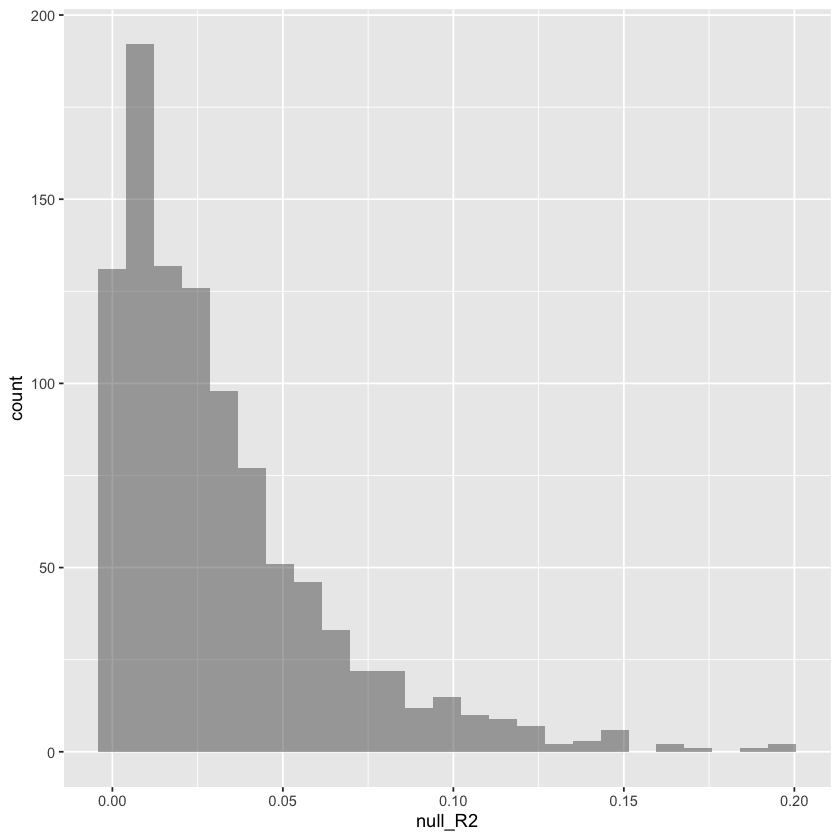

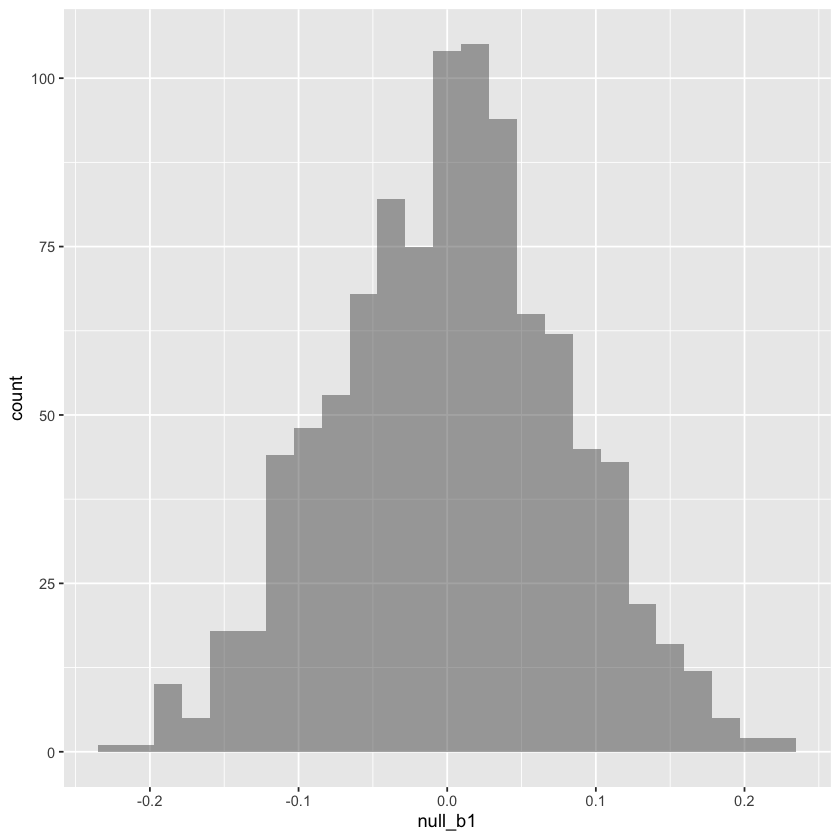

In [26]:
#creating an empty vector of 1000 spots
null_R2 <- vector(length=1000)

#generate 1000 unique samples, saving each R2
for (i in 1:1000) {
    GSS_subset$shuffled_mother <- sample(x=GSS_subset$highest_year_school_completed_mother, 
                                         size=length(GSS_subset$highest_year_school_completed_mother), 
                                         replace=FALSE)
    GSS_subset$shuffled_father <- sample(x=GSS_subset$highest_year_school_completed_father, 
                                         size=length(GSS_subset$highest_year_school_completed_father), 
                                         replace=FALSE)
    model <- lm(highest_year_of_school_completed ~ shuffled_mother + shuffled_father, data=GSS_subset)
    null_R2[i] <- summary(model)$r.squared
}

R2_df <- data.frame(null_R2)
gf_histogram( ~ null_R2, data=R2_df)

Walk yourself through every line of this permutation test code, and make sure you understand what it's doing and why. We're shuffling both of the predictors of mother's and father's education, using those shuffled predictors to predict the participants' education level, saving the model R<sup>2</sup>, and repeating that process 1,000 times. 

Then, investigate the shape of the R<sup>2</sup> null sampling distribution. Interestingly, it has a very different shape than the sampling distribution of &beta;. In the figure below we put two example sampling distributions side by side for purposes of comparison.

<img src="images/ch18-R2b1.png" width="750">

The sampling distribution of &beta; has two tails because the effect of a predictor could be positive or could be negative. But R<sup>2</sup> is different: the full model can explain none of the error compared to the empty model (0), or up to all of the error from the empty model (1). But it cannot explain less than 0 error. Because R<sup>2</sup> is a proportion, it has a clear lower bound of 0, and a clear upper bound of 1.

Assuming the null hypothesis is true, the only place an extreme R<sup>2</sup> could fall is in the upper tail of the distribution, which is why there is only one tail. An extreme positive effect of parental education *or* an extreme negative effect of parental education are both the same to R<sup>2</sup>: both would make a predictive model, and fall in the upper tail of the sampling distribution of R<sup>2</sup>.

## 18.3 Significance testing a model

Once we have the null sampling distribution of R<sup>2</sup>, we can compare our estimate of R<sup>2</sup> to it. In this comparison, we ask ourselves - if R<sup>2</sup> = 0 in the population, is it likely or unlikely to get an estimate of R<sup>2</sup> such as ours? 

In the null distribution of &beta;, we considered something "unlikely" if it was outside the area where 95% of b estimates would fall. In other words, an unlikely b estimate is one that is at least 1.96 standard errors above or below &beta; = 0. 

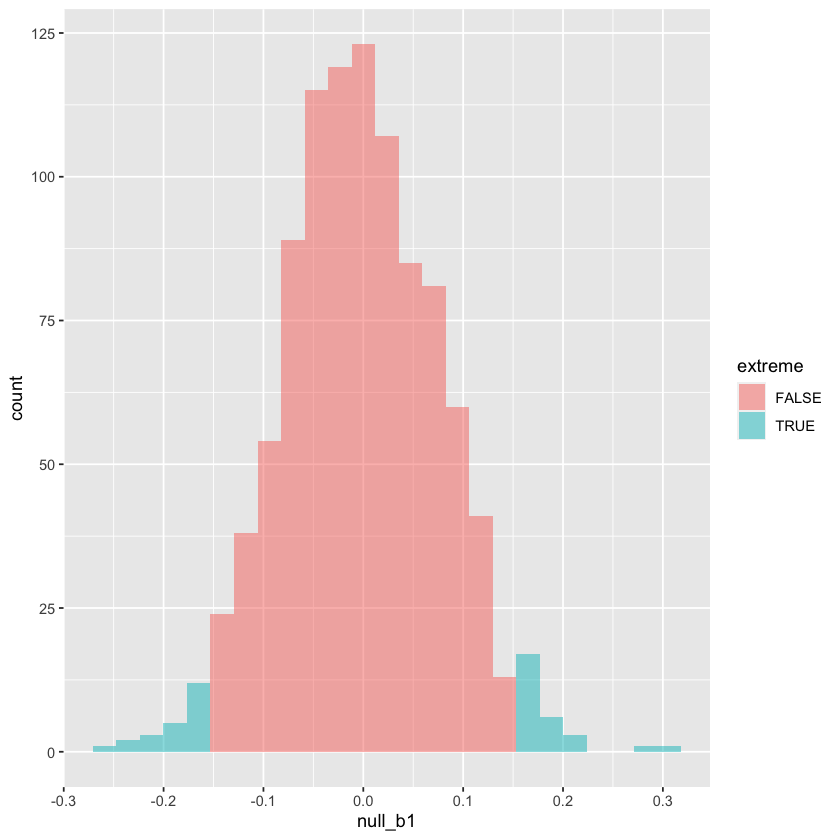

In [28]:
#creating an empty vector of 1000 spots
null_b1 <- vector(length=1000)

#generate 1000 unique samples, saving each b1
for (i in 1:1000) {
    GSS_subset$shuffled_mother <- sample(x=GSS_subset$highest_year_school_completed_mother, 
                                         size=length(GSS_subset$highest_year_school_completed_mother), 
                                         replace=FALSE)
    model <- lm(highest_year_of_school_completed ~ shuffled_mother, data=GSS_subset)
    null_b1[i] <- model$coefficients[[2]]
}

b1_df <- data.frame(null_b1)

#cut-off values for extremeness
b1s_sd <- sd(b1_df$null_b1)
high_cutoff <- sd(b1_df$null_b1)*1.96
low_cutoff <- sd(b1_df$null_b1)*-1.96

#marking something as extreme if it is greater than 1.96*sd or less than -1.96*sd
b1_df$extreme <- b1_df$null_b1 > high_cutoff | b1_df$null_b1 < low_cutoff

gf_histogram(~ null_b1, data = b1_df, fill = ~extreme)

There are two "zones" of unlikeliness in this distribution, because a b estimate can either be greater than 0 or less than 0. 2.5% of the distribution is in each tail, adding up to the 5% of bs that count as unlikely. To check whether a particular estimate of b is unlikely (and thus significantly different from 0), we'd ask if it's larger than the 97.5%ile OR less than the 2.5%ile of the distribution.

In [32]:
simple_model <- lm(highest_year_of_school_completed ~ highest_year_school_completed_mother, data=GSS_subset)
b1 <- simple_model$coefficients[[2]]

quantile(null_b1, 0.025)
quantile(null_b1, 0.975)
b1
b1 > quantile(null_b1, 0.975) | b1 < quantile(null_b1, 0.025)

2.5% 
-0.1489152

97.5% 
0.1578148

[1] 0.3154907

97.5% 
 TRUE

In the sampling distribution of R<sup>2</sup>, an estimate can only be larger than 0, never less. There is one tail to the distribution. This means that if we were to use the same &alpha; criterion for significance as before, &alpha; = 0.05, the 5% unlikely estimates will all be in the high tail. Based on this fact, a significant R<sup>2</sup> is one that is larger than the 95%ile of the null sampling distribution.

In [33]:
full_model <- lm(highest_year_of_school_completed ~ highest_year_school_completed_mother +
                highest_year_school_completed_father, data = GSS_subset)
R2 <- summary(full_model)$r.squared

quantile(null_R2, 0.95)
R2 
R2 > quantile(null_R2, 0.95)

95% 
0.0986257

[1] 0.2857142

95% 
TRUE

Remember that a p-value is the probability of getting an estimate that is as extreme or more extreme as the one we got, if the population parameter were 0. To calculate the p-value for a model's R<sup>2</sup> score, we'd count the proportion of the null sampling distribution that is at least as extreme as our model estimate. 

In [34]:
more_positive <- null_R2 > R2
num_more_positive <- sum(more_positive)

num_more_positive / length(null_R2)

[1] 0

According to this, we didn't simulate any R<sup>2</sup>s from the null distribution that were larger than the R<sup>2</sup> we estimated from the dataset. Its p-value is something less than 1 in a thousand: p < 0.001. 

## 18.4 The F distribution

The shape of this sort of one-tailed distribution is called an **F distribution**. Much in the same way original statisticians had to build a mathematical formula to represent the theoretical shape of a coefficient's sampling distribution (the t distribution), they also built one for model performance.  

<img src="images/ch18-fdist.png" width="500">

The shape of an F distribution is controlled by two values: the number of predictor parameters in a model (k) and the degrees of freedom of a model (N-k). k sets where the peak of the distribution is horizontally, while the ratio of k to df sets what proportion of the area is in the major peak versus the tail.

The width of the null sampling distribution for a b estimate is directly proportional to the sample size N, such that smaller N's lead to wider distributions. This is because the estimates from smaller sample sizes are less stable, so larger estimates are considered more likely. The same principle applies in the null sampling distribution of R<sup>2</sup>, but it's not just the sample size that determines this. It's the degrees of freedom, N-k. A model could be fit in a large dataset, but if a large number of parameters are also fit, the R<sup>2</sup> estimate will be less stable than a model fit with just a couple of parameters. This is because, with many parameters, there are a lot more ways the set of bs can vary! With more ways bs can vary, a wider range of R<sup>2</sup>s are likely.

With permutation testing, we can calculate a p-value by counting up the proportion of the simulated null sampling distribution that is as extreme or more extreme than an estimated R<sup>2</sup> value. But again, R can also give the exact p-value to us in the ```summary()``` output, but using the math of the F distribution.

In [35]:
summary(full_model)


Call:
lm(formula = highest_year_of_school_completed ~ highest_year_school_completed_mother + 
    highest_year_school_completed_father, data = GSS_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6085 -1.5057 -0.3986  1.6772  5.1415 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           9.60849    0.99629   9.644 5.05e-14 ***
highest_year_school_completed_mother  0.08480    0.10156   0.835  0.40693    
highest_year_school_completed_father  0.29020    0.09913   2.928  0.00475 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.249 on 63 degrees of freedom
  (34 observations deleted due to missingness)
Multiple R-squared:  0.2857,	Adjusted R-squared:  0.263 
F-statistic:  12.6 on 2 and 63 DF,  p-value: 2.494e-05


Don't be distracted by the p-values for each separate predictor. Right now we're not interested in how strong each of those effects are individually, just how well they combine to make predictions. 

We now know how to find the model's R<sup>2</sup> value in this output: it is the number labeled "Multiple R-squared" on the second to the last line. For the p-value of that estimate, look below it at the last line of the output. There will be a number for "F-statistic" that tells you how extreme on the null F distribution this R<sup>2</sup> would fall, along with the two values that determine the shape of the F distribution: the number of predictor coefficients (2; the intercept isn't counted here) and the degrees of freedom (63). Next to that is a number labeled "p-value." That is the p-value for the entire model. 

Notice that the p-value in our example is still significant even though one of the predictors in the model is not. The model as a whole is likely to make better predictions than the empty model, even if not all the predictors significantly contribute to those predictions. 

We can use the p-value to decide, based on our stated alpha of .05, whether the observed sample statistic would be unlikely or not if the null hypothesis is true. If we judge it to be unlikely (i.e., p < .05), then we would most likely decide to reject the empty model in favor of this more complex model. But if the p-value is greater than .05, we would probably decide to stick with the empty model for now, pending further evidence. It's more parsimonious, and an insignificant model would be adding complexity without enough of an improvement in predictions to make that complexity worth it. 

## 18.5 Comparing different full models

Testing the significance of a model's R<sup>2</sup> estimate lets you test whether or not the model as a whole is likely to perform similarly to the empty model - whether or not this R<sup>2</sup> estimate likely comes from a world where all the beta estimates are truly 0. It's a test of whether or not we are confident that this model will perform better than nothing. 

But that's not the only kind of question we might have about a model. Perhaps instead of a comparison to the empty model, we want to make comparisons between different full models. As an example, maybe we're using the data in the GSS to help us plan a study of our own that will explore why parental education is related to child education. We're only going to have enough funding to talk to one parent though, so we want to know if either mother's or father's education is a significantly *better* predictor of child education. 

Can we just make two separate simple linear models and look at the R<sup>2</sup> of each model separately? Do this below and examine the outputs. 

In [ ]:
#Fit a linear model predicting highest_year_of_school_completed with highest_year_school_completed_mother
#in GSS_subset
mother_model <- 

#return the summary of that model

#Fit a linear model predicting highest_year_of_school_completed with highest_year_school_completed_father
#in GSS_subset
father_model <- 

#return the summary of that model


The R<sup>2</sup> estimate for ```mother_model``` is 0.223, while the R<sup>2</sup> estimate for ```father_model``` is 0.290. Both models themselves are significant, so to answer our question about which one explains more variation overall, let's look at the difference between these values. Just from the raw numbers, it looks like father's education will explain more variation in child education than mother's education will. The *difference* in these R<sup>2</sup> estimates, &Delta;R<sup>2</sup>, is 0.067 in favor of the father model. 

But both of these R<sup>2</sup> values are point estimates, drawn from the population of possible R<sup>2</sup> values. We know not every sample will have these exact R<sup>2</sup> values. Is it possible that the R<sup>2</sup> for father's education is larger than the R<sup>2</sup> for mother's education just by chance? I.e., is the true &Delta;R<sup>2</sup> in the population actually equal to 0? 

We can develop a null hypothesis about any statistical estimate we want. In this case, the estimate we care about is not the exact R<sup>2</sup> value of the two models, but whether one is significantly larger than the other. Our null hypothesis is:

$$H_0: R^2_1 - R^2_2 = \Delta{R^2} = 0$$

More complicated estimates like these don't have a pre-defined shape of the null sampling distibution - original statisticians could only do so much. Because of this, there isn't a simple way to compute the p-value of &Delta;R<sup>2</sup>. But this is where permutation testing really shines, and is the sort of case where it is used for real research. If you don't know the shape of the null sampling distribution ahead of time, you can always generate one with simulations and use that **experimental null** to test the null hypothesis. 

The easiest way to build a null sampling distribution for &Delta;R<sup>2</sup> is to make both R<sup>2</sup><sub>1</sub> and R<sup>2</sup><sub>2</sub> equal to 0, and find the difference between them. This way any differences found would be the result of both of these estimates varying around 0. Below is some incomplete code for doing this permutation test. Fill in the missing lines in order to generate a null sampling distribution of &Delta;R<sup>2</sup>. Remember that to do this permutation test, we need to shuffle the predictors, as R<sup>2</sup> = 0 when all b estimates in a model equal 0.

In [ ]:
#creating an empty vector of 1000 spots
null_deltaR2 <- vector(length=1000)

#generate 1000 unique samples, saving each R2
for (i in 1:1000) {
    GSS_subset$shuffled_mother <- #YOUR CODE HERE
    mother_model <- lm(highest_year_of_school_completed ~ shuffled_mother, data=GSS_subset)
    R2_mother <- summary(mother_model)$r.squared
    GSS_subset$shuffled_father <- #YOUR CODE HERE
    father_model <- lm(highest_year_of_school_completed ~ shuffled_father, data=GSS_subset)
    R2_father <- summary(father_model)$r.squared
    null_deltaR2[i] <- R2_mother - R2_father
}

deltaR2_df <- data.frame(null_deltaR2)

gf_histogram(~ null_deltaR2, data = deltaR2_df)

The shape of this distribution is two tailed, because it's possible to have a &Delta;R<sup>2</sup> that is either positive or negative - R<sup>2</sup> for ```mother_model``` might be bigger, or it might be smaller than ```father_model```. Because of this the null sampling distribution of &Delta;R<sup>2</sup> is clearly not an F distribution. But it's also a much skinnier distribution than the t distribution. We haven't learned about a specific shape this distribution is expected to look like, but with permutation testing we don't need that. To find the p-value of our estimated &Delta;R<sup>2</sup> of 0.067, we just need to find the proportion of the experimental null distribution that is at least as extreme as this number (in both the positive and negative tails).

In [36]:
more_positive <- null_deltaR2 > 0.067
num_more_positive <- sum(more_positive)
more_negative <- null_deltaR2 < -0.067
num_more_negative <- sum(more_negative)

(num_more_positive + num_more_negative) / length(null_deltaR2)

ERROR: Error in eval(expr, envir, enclos): object 'null_deltaR2' not found


You might get a slightly different p-value because of the random samples that ended up in your experimental null distribution. But when running this code to write this chapter, I got p = 0.025. This would indicate than a &Delta;R<sup>2</sup> = 0.067 only has a 2.5% chance of occurring when the true population &Delta;R<sup>2</sup> = 0. This is less than our &alpha; criterion of 0.05, so we reject the null hypothesis that ```mother_model``` and ```father_model``` explain equal amounts of variation. We choose father's education as the better predictor. 

Lets consider another model comparison case we might care about. Perhaps we aren't sure whether father's education is related to child's education linearly, or nonlinearly. Maybe the difference between a father who graduated high school versus not has a bigger effect on a child's level of education than the difference between a father with a master's and a PhD degree. Let's repeat the same process as above, but comparing R<sup>2</sup> values for the linear vs. nonlinear version of the model.  

In [38]:
linear_model <- lm(highest_year_of_school_completed ~ highest_year_school_completed_father, 
                   data=GSS_subset)
summary(linear_model)$r.squared

#Converting to log, adding a small value to any 0s so that the log isn't -Inf
GSS_subset$nonlinear_father <- log(GSS_subset$highest_year_school_completed_father + 0.001)
nonlinear_model <- lm(highest_year_of_school_completed ~ nonlinear_father, data=GSS_subset)
summary(nonlinear_model)$r.squared

[1] 0.2897238

[1] 0.337081

The point estimates of each R<sup>2</sup> indicate that the nonlinear model might be better: &Delta;R<sup>2</sup> = 0.047. But we have to run a null hypothesis test to see how confidence we are in that. Complete the code below to run this permutation test.

In [ ]:
#creating an empty vector of 1000 spots
null_deltaR2 <- vector(length=1000)

#generate 1000 unique samples, saving each R2
for (i in 1:1000) {
    GSS_subset$shuffled_father_linear <- #YOUR CODE HERE
    #Add a small value to any 0s so that the log isn't -Inf
    GSS_subset$shuffled_father_nonlinear <- log(GSS_subset$shuffled_father_linear + 0.001)
    linear_model <- lm(highest_year_of_school_completed ~ shuffled_father_linear, data=GSS_subset)
    R2_linear <- summary(linear_model)$r.squared
    nonlinear_model <- lm(highest_year_of_school_completed ~ shuffled_father_nonlinear, data=GSS_subset)
    R2_nonlinear <- summary(nonlinear_model)$r.squared
    null_deltaR2[i] <- R2_linear - R2_nonlinear
}

deltaR2_df <- data.frame(null_deltaR2)

gf_histogram(~ null_deltaR2, data = deltaR2_df)

more_positive <- null_deltaR2 > 0.047
num_more_positive <- sum(more_positive)
more_negative <- null_deltaR2 < -0.047
num_more_negative <- sum(more_negative)

(num_more_positive + num_more_negative) / length(null_deltaR2)

When I ran this test, my p-value = 0.058. That is not smaller than 0.05, so we fail to reject the null hypothesis. We aren't confident enough that the linear vs. nonlinear models are different from each other in how much variation they explain. In that case, I would probably go with the linear model, because it is simpler to understand. 

Lastly, maybe we want to know whether adding some new predictors would significantly improve a model compared to a more reduced model. This is like calculating the significance of a model compared to the empty model, except now we're comparing to a simple, but not empty model. In fact, testing the significance of a model's R<sup>2</sup> compared to the empty model is just a special case of testing the significance of &Delta;R<sup>2</sup> - it's just &Delta;R<sup>2</sup> in than case is the difference between R<sup>2</sup> and 0. Let's test whether or not adding ```number_of_brothers_and_sisters``` and ```born_in_us``` significantly improve the predictions of ```father_model```.

First, we generate point estimates of R<sup>2</sup> for both versions of the model, and compute an estimated &Delta;R<sup>2</sup>. 

In [39]:
simple_model <- lm(highest_year_of_school_completed ~ highest_year_school_completed_father, 
                   data=GSS_subset)
summary(simple_model)$r.squared

full_model <- lm(highest_year_of_school_completed ~ highest_year_school_completed_father + 
                                                     number_of_brothers_and_sisters + 
                                                     born_in_us, data=GSS_subset)
summary(full_model)$r.squared

[1] 0.2897238

[1] 0.3338153

Looks like the full model might be 0.044 better, but we have to run the permutation test to be confident! 

[1] 0.203

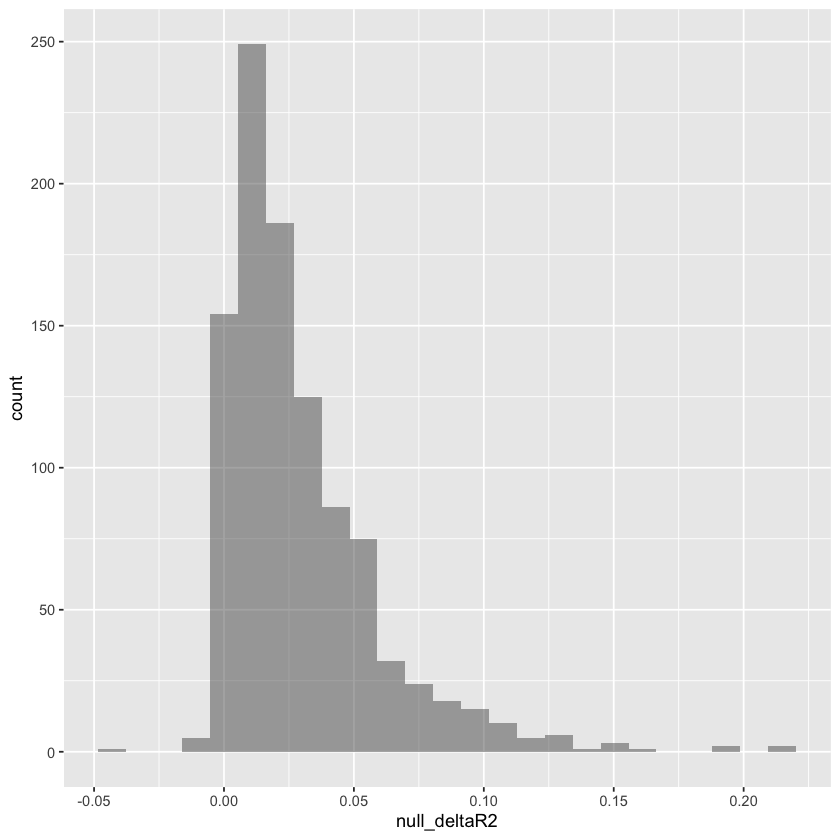

In [41]:
#creating an empty vector of 1000 spots
null_deltaR2 <- vector(length=1000)

#generate 1000 unique samples, saving each R2
for (i in 1:1000) {
    GSS_subset$shuffled_father <- sample(GSS_subset$highest_year_school_completed_father, 
                                              size=nrow(GSS_subset), 
                                              replace=FALSE)
    #Have to shuffle all predictors
    GSS_subset$shuffled_siblings <- sample(GSS_subset$number_of_brothers_and_sisters, 
                                              size=nrow(GSS_subset), 
                                              replace=FALSE)
    GSS_subset$shuffled_usborn <- sample(GSS_subset$born_in_us, 
                                              size=nrow(GSS_subset), 
                                              replace=FALSE)
    simple_model <- lm(highest_year_of_school_completed ~ shuffled_father, data=GSS_subset)
    R2_simple <- summary(simple_model)$r.squared
    full_model <- lm(highest_year_of_school_completed ~ shuffled_father + shuffled_siblings + 
                                                         shuffled_usborn, data=GSS_subset)
    R2_full <- summary(full_model)$r.squared
    null_deltaR2[i] <- R2_full - R2_simple
}

deltaR2_df <- data.frame(null_deltaR2)

gf_histogram(~ null_deltaR2, data = deltaR2_df)

more_positive <- null_deltaR2 > 0.047
num_more_positive <- sum(more_positive)
more_negative <- null_deltaR2 < -0.047
num_more_negative <- sum(more_negative)

(num_more_positive + num_more_negative) / length(null_deltaR2)

This distribution is almost entirely one-tailed in the positive direction, because we know adding predictors (even insignificant ones) increases a model's R<sup>2</sup>. In fact, according to this experimental null distribution, about 20% of the time we'd expect the larger model to outperform the simpler model by a &Delta;R<sup>2</sup> of at least 0.044 even when the population &Delta;R<sup>2</sup> is 0 (p = 0.203). &Delta;R<sup>2</sup> = 0.044 is not a significant change in model performance. The full model is likely significant compared to the empty model, but it is not significantly better than the simple model. In that case we'd probably go with the simple model because it's easier to understand.  

Comparing different models like this is called **model selection**. It is useful when you want to find out what predictors are better than others, whether a nonlinear model is a better fit to the data than a linear model, and/or whether adding new predictors significantly improves predictions. We can't look at the raw error estimates from models in order to make these decisions, because those are estimates than might vary sample to sample. But by directly comparing estimates with permutation testing, we can see the expected distribution of estimates under the null hypothesis, and decide whether our estimate is likely to occur in that scenario, or whether a true difference in models probably exists. 

## 18.6 Importance of direct comparison

The model selection exercise we did above highlights the importance of statistically comparing models, and not just looking at the difference in point estimates. Each model's R<sup>2</sup> is an estimate that varies sample to sample, so any difference between them also varies sample to sample and may be 0 in the population. 

Sometimes you will find researchers who do this incorrectly. There is published research out there where the analysts chose a model based on which point estimate was larger, but not by testing the difference in point estimates against a null distribution.

Another common direct comparison mistake is to say that, because one model was significant and another was not, therefor the models are significantly different from *each other*. To see why this is wrong, imagine the situation where one model A's p-value is 0.035, and another model B's p-value is 0.074. Model A is significant while Model B is not. Seems that would mean Model A is automatically better, right? But what if we told you the R<sup>2</sup> value of Model A was 0.22 and the R<sup>2</sup> value of Model B was 0.17. Thus, &Delta;R<sup>2</sup> is 0.05. We've seen examples already where &Delta;R<sup>2</sup> = 0.05 is likely to occur when the population &Delta;R<sup>2</sup> is actually 0. Thus, just because Model A is significantly different from 0 and Model B is not, does not mean that either of those models are significantly better than each other. It could be that Model B had slightly too few data points to find a confidence interval of the coefficients that does not include 0. This is particularly evident if you visualize both models: 

<img src="images/ch18-directcomp.png" width="450">

Clearly, Model B does not look all that different from Model A. It just so happens that their estimates fall slightly on either side of the &alpha; = 0.05 criterion.

So keep this in mind: if you ever want to make a statement that one thing is significantly better than another thing, you need to directly compare them with a statistical test. If comparing groups, make sure "group" is a variable in one model so that the beta coefficient of group differences can be tested against &beta; = 0. If comparing models, make sure to test the difference in model R<sup>2</sup> scores against a null sampling distribution of &Delta;R<sup>2</sup> = 0. 

## 18.7 Multiple comparisons problem

Another thing to be aware of in model selection is what's called the **multiple comparisons problem**. 

Imagine you want to select the best model among 4 options, A, B, C, and D. You start out by testing A against B, then against C, and against D. In each of these comparisons, you find that Model A was significantly better because the p-value of &Delta;R<sup>2</sup> was <0.05 for each comparison (e.g., p = 0.01, p = 0.005, p = 0.04). Sounds great, right? 

But there is a danger to doing multiple comparisons like this. When we do a hypothesis test, we set an &alpha; level to define what will count as an “unlikely” sample estimate. It is common to set &alpha; = 0.05, such that any estimate in the null sampling distribution that is more extreme than the 0.05 boundary is considered unlikely to be produced by the null sampling distribution.

But that doesn't mean the null sampling distribution *can't* produce it. It is possible that we reject the null hypothesis when it is in fact true - that we commit a Type I error. 

If we set our Type I error rate at 0.05 (that is, we define 5% of the least likely estimates as unlikely) and we do a lot of hypothesis tests, we will make a Type I error, on average, one out of every 20 times (that is, 5% of the time), rejecting the empty model when, in fact, the empty model is true. Every time we find a statistically significant result, there is a 5% chance that we are incorrectly rejecting the null hypothesis. On the flipside, that means we avoid making a Type I error 95% of the time.

This is okay if all we care about is a single test. But if we do three tests in sequence as in the example above, we want to achieve a 95% rate of avoiding Type I error across all three tests, not just for each one separately.

You can think of it like flipping a coin. If you flip a coin once, the probability that it will come up heads is 50%. But if you flip a coin three times, the probability of all three coming up heads is a lot less than 50%. Similarly, if you do a single hypothesis test, the probability of avoiding a Type I error is 95%. But if you do three hypothesis tests, the probability of avoiding a Type I error is a lot less than 95%.

How much less than 95%? If the probability of one test not being wrong is 95%, the probability that none of the three tests is wrong would be 95%\*95%\*95%, or 0.857. Therefore, the probability that any one of these three tests is wrong is 1 minus 0.857, or 0.143. This is called the **family-wise error rate**. What this means is that the probability of making a Type I error on any one of the three comparisons is 0.143 (which is a lot higher than 0.05). With every additional hypothesis test we run, the chance increases that we've made a Type I error somewhere.

This isn't a big deal when you have one hypothesis to test. But in modern scientific research, we are increasingly asking questions that involve many hypothesis tests. E.g., in model selection, where we test many models to see which makes the best predictions; or in cases where there are multiple outcome measures to make predictions about. These scenarios can be found all across the social and life sciences. The more tests that are run, the bigger the Type I error and risk of erroneous conclusions such as [finding significant brain activity in a dead salmon](https://www.wired.com/2009/09/fmrisalmon/).  

To control this family-wise error rate are a suite of methods that do **multiple comparison correction**. Some involve more sophisticated math than others, but all involve adjusting the p-values of a hypothesis test before comparing it to an &alpha; criterion for making decisions about significance. This adjustment is dependent on the number of tests we have to run. The simplest multiple comparison correction method is called the Bonferroni adjustment, named after the person who proposed it. In this method, if we want to maintain a 95% chance of not making a Type I error on *any* of our comparisons, we would simply multiply the p-value of each test times the number of comparisons before comparing it to the alpha criterion.

In our model selection example above, Model A was better than Models B, C, and D at p = 0.01, p = 0.005, and p = 0.04, respectively. If any of those comparisons had been done alone, we would simply compare those p-values to &alpha; = 0.05 and find that Model A is significantly better. But because we did three tests, there is a risk that any one of those tests is an incorrect rejection of the null hypothesis. In order to control that risk with Bonferroni correction and keep the Type I *family-wise* error rate to 5%, we multiply each of those p-values by the number of tests we ran: 

- Model A vs. Model B: p = 0.01 \* 3 = 0.03
- Model A vs. Model C: p = 0.005 \* 3 = 0.015
- Model A vs. Model D: p = 0.04 \* 3 = 0.12

After multiple comparison correction, Model A no longer looks significantly better than Model D. 

The Bonferroni adjustment is straightforward, and essentially makes our decision criteria for any one test among the set more stringent. But some think it is overly conservative - in other words, that it’s trying too hard to protect us from making Type I error. The corrected p-value can get very large if the number of simultaneous comparisons gets large. Although this decreases the chance of making a Type I error, it increases the chance of making a Type II error of not detecting a difference when one does exist. We've taught you the Bonferroni correction because it is the easiest to use, but other less conservative multiple comparison corrections are more common in research and include [Tukey's Honestly Significant Difference Test](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/post-hoc/tukey-test-honest-significant-difference/) and the [Benjamini-Hochberg False Discovery Rate](https://www.statisticshowto.com/benjamini-hochberg-procedure/). 

## Chapter summary

After reading this chapter, you should be able to: 

- Find the R<sup>2</sup> estimate in a model output
- Generate the null sampling distribution of R<sup>2</sup>
- Test the significance of a model 
- Perform model selection among different models
- Explain the importance of direct comparison
- Conduct multiple comparison correction